In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from statistics import mean 
import numpy as np
import matplotlib.pyplot as plt
import data

In [2]:
# Loading up the data
d = data.Data()

# 1.1 Exploratory Data Analysis 
### Columns for our individual data

In [3]:
list(d.individual.columns)

['age',
 'sex',
 'province',
 'country',
 'latitude',
 'longitude',
 'date_confirmation',
 'additional_information',
 'source',
 'outcome']

In [4]:
### Columns for our location data

In [5]:
list(d.location.columns)

['Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Combined_Key',
 'Incidence_Rate',
 'Case-Fatality_Ratio']

## Values missing from the individual cases

In [6]:
for col in d.individual.columns:
    print(f'Column {col} has {d.individual[col].isna().sum()} missing values')

Column age has 296874 missing values
Column sex has 293734 missing values
Column province has 6566 missing values
Column country has 2 missing values
Column latitude has 2 missing values
Column longitude has 2 missing values
Column date_confirmation has 462 missing values
Column additional_information has 522969 missing values
Column source has 209191 missing values
Column outcome has 0 missing values


## Values missing from the location cases

In [7]:
for col in d.location.columns:
    print(f'Column {col} has {d.location[col].isna().sum()} missing values')

Column Province_State has 168 missing values
Column Country_Region has 0 missing values
Column Last_Update has 0 missing values
Column Lat has 80 missing values
Column Long_ has 80 missing values
Column Confirmed has 0 missing values
Column Deaths has 0 missing values
Column Recovered has 0 missing values
Column Active has 2 missing values
Column Combined_Key has 0 missing values
Column Incidence_Rate has 80 missing values
Column Case-Fatality_Ratio has 48 missing values


## 1.2 Converting the age to a reasonable value
For range ages we used the mean of the upper and lower bound to represent the age of the patient and for ages that we had an age and above, we use the base age for representing the patients age

In [8]:
d.individual['age'] = d.individual['age'].apply(d.format_age)
d.individual.head(5)

age     sex          province country  latitude  longitude  \
0   NaN     NaN           Gujarat   India  23.02776   72.60027   
1  21.0    male         Moyobamba    Peru  -6.03271  -76.97230   
2  94.0  female              Lima    Peru -12.04318  -77.02824   
3   NaN     NaN           Gujarat   India  23.02776   72.60027   
4   2.0  female  Coronel Portillo    Peru  -8.40921  -74.55572   

  date_confirmation additional_information  \
0        15.04.2020                    NaN   
1        09.05.2020                    NaN   
2        15.04.2020                    NaN   
3        22.05.2020                    NaN   
4        30.04.2020                    NaN   

                                              source          outcome  
0  https://gujcovid19.gujarat.gov.in/uploads/pres...     hospitalized  
1                                                NaN  nonhospitalized  
2                                                NaN  nonhospitalized  
3  https://www.deshgujarat.com/2020/05/22/gujarat...     hospitalized  
4                                                NaN  nonhospitalized

## Formating the dates

In [9]:
d.individual['date_confirmation']=d.individual['date_confirmation'].apply(d.format_dates)
d.individual.head(5)

age     sex          province country  latitude  longitude  \
0   NaN     NaN           Gujarat   India  23.02776   72.60027   
1  21.0    male         Moyobamba    Peru  -6.03271  -76.97230   
2  94.0  female              Lima    Peru -12.04318  -77.02824   
3   NaN     NaN           Gujarat   India  23.02776   72.60027   
4   2.0  female  Coronel Portillo    Peru  -8.40921  -74.55572   

  date_confirmation additional_information  \
0        2020-04-15                    NaN   
1        2020-05-09                    NaN   
2        2020-04-15                    NaN   
3        2020-05-22                    NaN   
4        2020-04-30                    NaN   

                                              source          outcome  
0  https://gujcovid19.gujarat.gov.in/uploads/pres...     hospitalized  
1                                                NaN  nonhospitalized  
2                                                NaN  nonhospitalized  
3  https://www.deshgujarat.com/2020/05/22/gujarat...     hospitalized  
4                                                NaN  nonhospitalized

## 1.1b Graphs

In [10]:
import graphs.graphs as gp

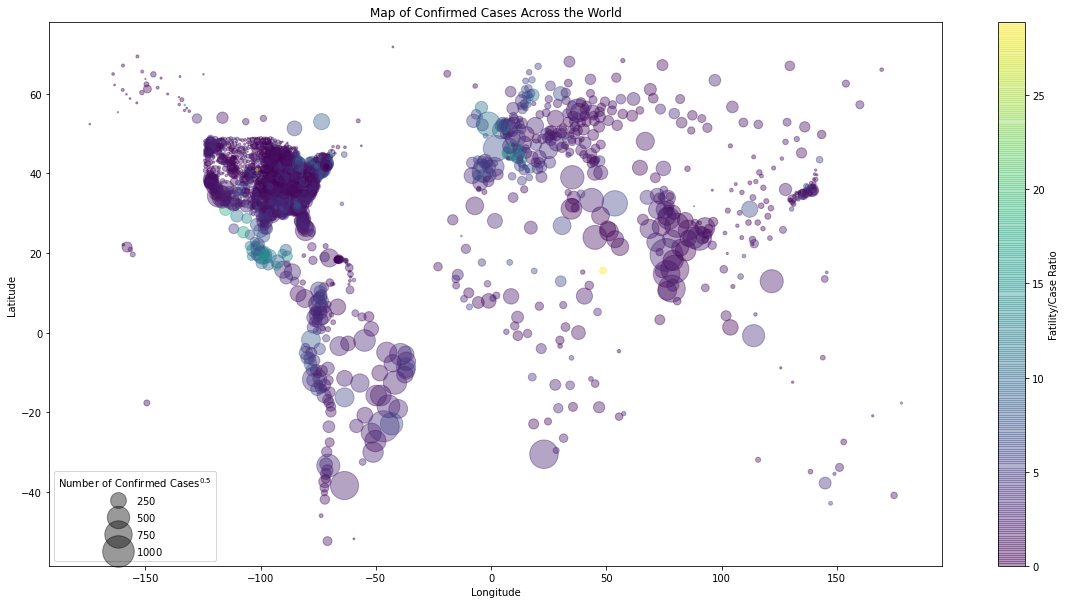

In [11]:
gp.confirmed_cases(d.location)

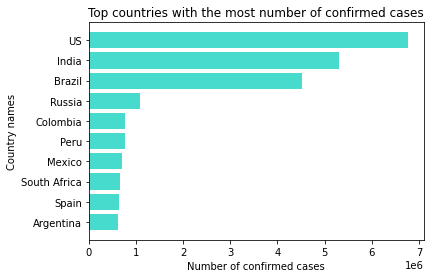

In [12]:
gp.most_confirmed_cases(d.location)

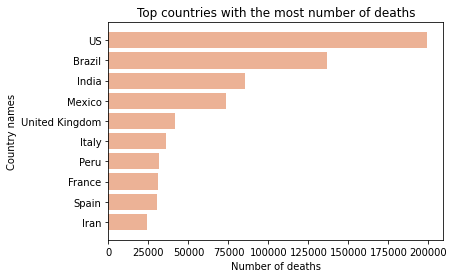

In [13]:
gp.most_deaths(d.location)

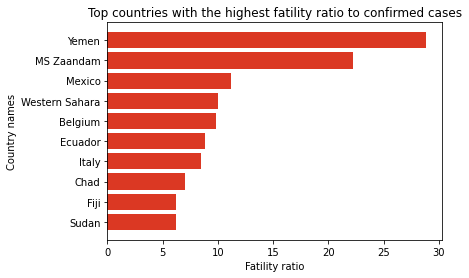

In [14]:
gp.most_fatality_rate(d.location)

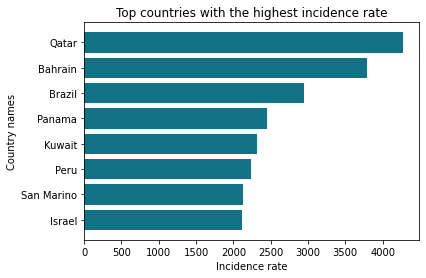

In [15]:
gp.most_incidence_rate(d.location)

C:\Users\Leo\Desktop\CMPT459\project\CMPT459-Project\graphs\graphs.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


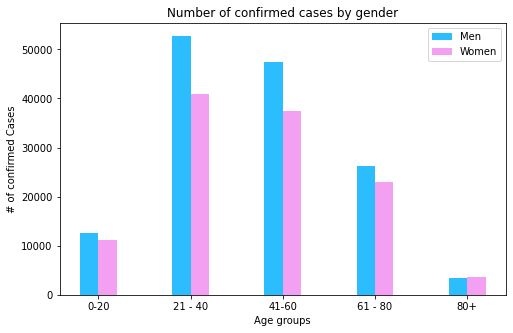

In [16]:
gp.male_female_cases(d.individual)

# 1.3 Remove outliers

In [17]:
# Remove values without longitude and latitude. These values are cruiseships and unknown counties
# Remove values with out-of-bounds long/lat ranges
d.location = d.remove_outliers_loc(d.location)
d.location.head(5)

Province_State Country_Region          Last_Update       Lat      Long_  \
0            NaN    Afghanistan  2020-09-20 04:22:56  33.93911  67.709953   
1            NaN        Albania  2020-09-20 04:22:56  41.15330  20.168300   
2            NaN        Algeria  2020-09-20 04:22:56  28.03390   1.659600   
3            NaN        Andorra  2020-09-20 04:22:56  42.50630   1.521800   
4            NaN         Angola  2020-09-20 04:22:56 -11.20270  17.873900   

   Confirmed  Deaths  Recovered   Active Combined_Key  Incidence_Rate  \
0      38919    1437      32576   4906.0  Afghanistan       99.976005   
1      12226     358       6888   4980.0      Albania      424.838418   
2      49623    1665      34923  13035.0      Algeria      113.162645   
3       1564      53       1164    347.0      Andorra     2024.202420   
4       3901     147       1445   2309.0       Angola       11.869312   

   Case-Fatality_Ratio  
0             3.692284  
1             2.928186  
2             3.355299  
3             3.388747  
4             3.768265

In [18]:
# Drop empty cases with no country or location data
# Remove values with out-of-bounds long/lat ranges
d.individual = d.remove_outliers_ind(d.individual)
d.individual.head(5)

age     sex          province country  latitude  longitude  \
0   NaN     NaN           Gujarat   India  23.02776   72.60027   
1  21.0    male         Moyobamba    Peru  -6.03271  -76.97230   
2  94.0  female              Lima    Peru -12.04318  -77.02824   
3   NaN     NaN           Gujarat   India  23.02776   72.60027   
4   2.0  female  Coronel Portillo    Peru  -8.40921  -74.55572   

  date_confirmation additional_information  \
0        2020-04-15                    NaN   
1        2020-05-09                    NaN   
2        2020-04-15                    NaN   
3        2020-05-22                    NaN   
4        2020-04-30                    NaN   

                                              source          outcome  
0  https://gujcovid19.gujarat.gov.in/uploads/pres...     hospitalized  
1                                                NaN  nonhospitalized  
2                                                NaN  nonhospitalized  
3  https://www.deshgujarat.com/2020/05/22/gujarat...     hospitalized  
4                                                NaN  nonhospitalized

# 1.4 Aggregate states 

## US cases

In [19]:
us_cases = d.location[d.location['Country_Region'] == 'US'].groupby(['Province_State']).agg({'Confirmed':'sum'}).reset_index()
us_cases[['Province_State', 'Confirmed']].plot(x='Province_State',kind='bar',figsize=(24,8),logy=True,xlabel='States', ylabel='Log of # of cases', title='Confirmed cases across US', rot=75)
plt.close()

In [20]:
us_loc = d.location[d.location['Country_Region'] == 'US']
us_loc.head(5)

Province_State Country_Region          Last_Update        Lat      Long_  \
631        Alabama             US  2020-09-20 04:22:56  32.539527 -86.644082   
632        Alabama             US  2020-09-20 04:22:56  30.727750 -87.722071   
633        Alabama             US  2020-09-20 04:22:56  31.868263 -85.387129   
634        Alabama             US  2020-09-20 04:22:56  32.996421 -87.125115   
635        Alabama             US  2020-09-20 04:22:56  33.982109 -86.567906   

     Confirmed  Deaths  Recovered  Active          Combined_Key  \
631       1673      24          0  1649.0  Autauga, Alabama, US   
632       5047      49          0  4998.0  Baldwin, Alabama, US   
633        830       7          0   823.0  Barbour, Alabama, US   
634        628      10          0   618.0     Bibb, Alabama, US   
635       1542      14          0  1528.0   Blount, Alabama, US   

     Incidence_Rate  Case-Fatality_Ratio  
631     2994.505003             1.434549  
632     2260.856321             0.970874  
633     3362.229604             0.843373  
634     2804.322586             1.592357  
635     2666.620551             0.907912

In [21]:
states = us_loc['Province_State'].unique()

In [22]:
def weighted_sum(states, data, lat_long):
    weighted_list = []
    for state in states:
        tmp = data[data['Province_State'] == state]
        num = (tmp['Confirmed']*tmp[lat_long]).sum()
        den = tmp['Confirmed'].sum()
        total = num/den
        weighted_list.append(total)
    return weighted_list

In [23]:
weighted_lat_list = weighted_sum(states, us_loc, 'Lat')

In [24]:
weighted_long_list = weighted_sum(states, us_loc, 'Long_')

In [25]:
def sum_of_cases(caseStatus, states, data):
    sumOfCases = []
    for state in states:
        tmp = data[data['Province_State'] == state]
        total = 0
        for index, row in tmp.iterrows():
            if row.str.contains(state).any():
                total += row[caseStatus]
        sumOfCases.append(total)
    return sumOfCases

In [26]:
def population_Total(states, data):
    population = []
    for state in states:
        tmp = data[data['Province_State'] == state]
        total = 0
        for index, row in tmp.iterrows():
            if row.str.contains(state).any():
                ratio = row['Incidence_Rate']
                if ratio == 0:
                    continue
                cases = row['Confirmed']
                total += (cases*100000)/ratio
        population.append(total)
    return population

In [27]:
def aggregated_Incidence_Rate(population, confirmedSum):
    incidence_rate = []
    for a in range(len(population)):
        rate = (confirmedSum[a] * 100000)/population[a]
        incidence_rate.append(rate)
    return incidence_rate

In [28]:
def case_Fatality(confirmedCase, confirmedDeath):
    fatality_rate = []
    for a in range(len(confirmedCase)):
        fatality_rate.append((confirmedDeath[a]/confirmedCase[a])*100)
    return fatality_rate

In [29]:
def state_Key(states):
    keys = []
    for state in states:
        key = state + ", US"
        keys.append(key)
    return keys

In [30]:
total_US_State_Confirmed = sum_of_cases('Confirmed', states, us_loc)
total_US_State_Deaths = sum_of_cases('Deaths', states, us_loc)
total_US_State_Recovered = sum_of_cases('Recovered', states, us_loc)
total_US_State_Active = sum_of_cases('Active', states, us_loc)

population = population_Total(states, us_loc)
incidence_Rate = aggregated_Incidence_Rate(population, total_US_State_Confirmed)
fatality_Rate = case_Fatality(total_US_State_Confirmed, total_US_State_Deaths)
keys = state_Key(states)

# All US data updated at same time
temp = us_loc['Last_Update'].unique()
last_update = temp[0]

states_weighted_sum = pd.DataFrame({'state':states, 'country': 'United States', 'Last_Update': last_update, 'Lat':weighted_lat_list, 'Long_':weighted_long_list, 'Confirmed': total_US_State_Confirmed, 'Deaths': total_US_State_Deaths, 'Recovered': total_US_State_Recovered, 'Active': total_US_State_Active, 'Combined_Key': keys, 'Incidence_Rate': incidence_Rate, 'Case-Fatality_Ratio': fatality_Rate },)
states_weighted_sum.head(5)


state        country          Last_Update        Lat       Long_  \
0     Alabama  United States  2020-09-20 04:22:56  32.946377  -86.762849   
1      Alaska  United States  2020-09-20 04:22:56  61.728977 -148.497129   
2     Arizona  United States  2020-09-20 04:22:56  33.304434 -112.280897   
3    Arkansas  United States  2020-09-20 04:22:56  35.135365  -92.701716   
4  California  United States  2020-09-20 04:22:56  35.271573 -118.783025   

   Confirmed  Deaths  Recovered    Active    Combined_Key  Incidence_Rate  \
0     144164    2437          0  141727.0     Alabama, US     2940.211312   
1       6728      45          0    6683.0      Alaska, US      925.928475   
2     212938    5449          0  207489.0     Arizona, US     2925.488105   
3      73511    1181          0   72330.0    Arkansas, US     2435.910351   
4     783313   15018          0  768295.0  California, US     1982.457428   

   Case-Fatality_Ratio  
0             1.690436  
1             0.668847  
2             2.558961  
3             1.606562  
4             1.917241

# 1.5 Join Individual Cases with Location data

## Join Individual Cases with Province/State and Country Data with Location Data as well as Individual US Cases with US State Aggregated Data

In [31]:
countries = d.location['Country_Region'].unique()
loc_noUS = d.location[d.location.Country_Region != 'US']
individual_US = d.individual[d.individual.country == 'United States']
# Currently dealing with records that are non US and have a value for State
individual_hasState = d.individual[d.individual['province'].notna()]
individual_hasState = individual_hasState[individual_hasState['country'] != 'United States']
initial_Merge = pd.merge(individual_hasState, loc_noUS, left_on=['province', 'country'], right_on=['Province_State', 'Country_Region'], how = 'left')
US_Cases = individual_US.join(states_weighted_sum.set_index(['state','country']), how = 'left', on = ['province', 'country'])
initial_Merge = initial_Merge.append(US_Cases)
initial_Merge = initial_Merge.drop(columns=['Province_State', 'Country_Region'])
initial_Merge


age     sex          province        country   latitude  longitude  \
0        NaN     NaN           Gujarat          India  23.027760  72.600270   
1       21.0    male         Moyobamba           Peru  -6.032710 -76.972300   
2       94.0  female              Lima           Peru -12.043180 -77.028240   
3        NaN     NaN           Gujarat          India  23.027760  72.600270   
4        2.0  female  Coronel Portillo           Peru  -8.409210 -74.555720   
...      ...     ...               ...            ...        ...        ...   
557190   0.5     NaN           Florida  United States  26.152188 -80.487715   
557195   NaN     NaN          Virginia  United States  37.325836 -76.782770   
557235  49.0  female           Florida  United States  26.152188 -80.487715   
557314  39.0    male           Florida  United States  26.152188 -80.487715   
557348  67.0    male           Florida  United States  25.613599 -80.565963   

       date_confirmation additional_information  \
0             2020-04-15                    NaN   
1             2020-05-09                    NaN   
2             2020-04-15                    NaN   
3             2020-05-22                    NaN   
4             2020-04-30                    NaN   
...                  ...                    ...   
557190        2020-03-24                    NaN   
557195        2020-03-12                    NaN   
557235        2020-03-18                    NaN   
557314        2020-03-15                    NaN   
557348        2020-03-25                    NaN   

                                                   source          outcome  \
0       https://gujcovid19.gujarat.gov.in/uploads/pres...     hospitalized   
1                                                     NaN  nonhospitalized   
2                                                     NaN  nonhospitalized   
3       https://www.deshgujarat.com/2020/05/22/gujarat...     hospitalized   
4                                                     NaN  nonhospitalized   
...                                                   ...              ...   
557190                  https://floridahealthcovid19.gov/  nonhospitalized   
557195  http://www.vdh.virginia.gov/surveillance-and-i...  nonhospitalized   
557235   http://floridadisaster.org/globalassets/covid-19  nonhospitalized   
557314                                                NaN  nonhospitalized   
557348                  https://floridahealthcovid19.gov/  nonhospitalized   

                Last_Update        Lat      Long_  Confirmed   Deaths  \
0       2020-09-20 04:22:56  22.694884  71.590923   120336.0   3286.0   
1                       NaN        NaN        NaN        NaN      NaN   
2       2020-09-20 04:22:56 -11.766533 -76.604498   349167.0  14009.0   
3       2020-09-20 04:22:56  22.694884  71.590923   120336.0   3286.0   
4                       NaN        NaN        NaN        NaN      NaN   
...                     ...        ...        ...        ...      ...   
557190  2020-09-20 04:22:56  27.479001 -81.563378   679641.0  13287.0   
557195  2020-09-20 04:22:56  37.891770 -77.641568   139546.0   2988.0   
557235  2020-09-20 04:22:56  27.479001 -81.563378   679641.0  13287.0   
557314  2020-09-20 04:22:56  27.479001 -81.563378   679641.0  13287.0   
557348  2020-09-20 04:22:56  27.479001 -81.563378   679641.0  13287.0   

        Recovered    Active    Combined_Key  Incidence_Rate  \
0        100974.0   16076.0  Gujarat, India      188.400627   
1             NaN       NaN             NaN             NaN   
2             0.0  335158.0      Lima, Peru     3285.195465   
3        100974.0   16076.0  Gujarat, India      188.400627   
4             NaN       NaN             NaN             NaN   
...           ...       ...             ...             ...   
557190        0.0  666354.0     Florida, US     3164.397627   
557195        0.0  136558.0    Virginia, US     1634.885940   
557235        0.0  666354.0     Florida, US     3164.397627   
557

## Calculate values at Country level to supplement Individual cases with only Country data 

In [32]:
def get_weighted(data, what):
    return (data['Confirmed']*data[what]).sum()/data['Confirmed'].sum()

def get_Sum(data, what):
    return data[what].sum()

def country_Population(country):
    total = 0
    for index, row in country.iterrows():
            ratio = row['Incidence_Rate']
            cases = row['Confirmed']
            if ratio > 0:
                total += (cases*100000)/ratio
    return total

In [33]:
# Calculate Weighted location Centres of confirmed cases in each Country
tmp = d.location[d.location['Country_Region'] == 'Australia']
weighted = pd.DataFrame({'country':['Australia'],'Long_':[get_weighted(tmp, 'Long_')], 'Lat':[get_weighted(tmp, 'Lat')]})
for c in d.location['Country_Region'].unique():
    tmp = d.location[d.location['Country_Region'] == c]
    weighted = pd.concat([pd.DataFrame({'country':[c],'Long_':[get_weighted(tmp, 'Long_')], 'Lat':[get_weighted(tmp, 'Lat')]}),weighted])

# Sum up Confirmed, Deaths, Recovered, and Active rows for each country
columns = ['country', 'Combined_Key', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active']
tmp = d.location[d.location['Country_Region'] == 'Australia']
sums = pd.DataFrame(columns=columns)
#sums = pd.DataFrame({'country':['Australia'],'Confirmed':[get_Sum(tmp, 'Confirmed')], 'Deaths':[get_Sum(tmp, 'Deaths')], 'Recovered': [get_Sum(tmp, 'Recovered')], 'Active': [get_Sum(tmp, 'Active')]})
for c in d.location['Country_Region'].unique():
    temp = d.location[d.location['Country_Region'] == c]
    sums = pd.concat([pd.DataFrame({'country':[c], 'Combined_Key': [c], 'Last_Update': last_update, 'Confirmed':[get_Sum(temp, 'Confirmed')], 'Deaths':[get_Sum(temp, 'Deaths')], 'Recovered': [get_Sum(temp, 'Recovered')], 'Active': [get_Sum(temp, 'Active')]}), sums])
sums
#Calculate Case-fatality Ratio per country
columns = ['country','Case-Fatality_Ratio']
ratios = pd.DataFrame(columns=columns)
for index, row in sums.iterrows():
    ratio = (row['Deaths'] / row['Confirmed']) * 100
    ratios = pd.concat([pd.DataFrame({'country': row['country'], 'Case-Fatality_Ratio': [ratio]}), ratios])
    
# Merge everything so far together
weighted = weighted.join(sums.set_index('country'), on = 'country')
weighted = weighted.join(ratios.set_index('country'), on = 'country')
weighted

# Calcualte Incidence Rates at Country level
columns = ['country','Incidence_Rate']
rates = pd.DataFrame(columns=columns)
for index, row in sums.iterrows():
    tmp = d.location[d.location['Country_Region'] == row['country']]
    pop = country_Population(tmp)
    rate = (row['Confirmed'] * 100000)/pop
    rates = pd.concat([pd.DataFrame({'country': row['country'], 'Incidence_Rate': [rate]}), rates])

# Merge with the other recalculated values
weighted = weighted.join(rates.set_index('country'), on = 'country')
weighted

country       Long_        Lat        Combined_Key  \
0             Zimbabwe   29.154857 -19.015438            Zimbabwe   
0               Zambia   27.849332 -13.133897              Zambia   
0                Yemen   48.516388  15.552727               Yemen   
0       Western Sahara  -12.885800  24.215500      Western Sahara   
0   West Bank and Gaza   35.233200  31.952200  West Bank and Gaza   
..                 ...         ...        ...                 ...   
0              Andorra    1.521800  42.506300             Andorra   
0              Algeria    1.659600  28.033900             Algeria   
0              Albania   20.168300  41.153300             Albania   
0          Afghanistan   67.709953  33.939110         Afghanistan   
0            Australia  145.477120 -36.562753           Australia   

            Last_Update Confirmed Deaths Recovered   Active  \
0   2020-09-20 04:22:56      7672    225      5914   1533.0   
0   2020-09-20 04:22:56     14070    330     13365    375.0   
0   2020-09-20 04:22:56      2026    585      1221    220.0   
0   2020-09-20 04:22:56        10      1         8      1.0   
0   2020-09-20 04:22:56     35003    253     23446  11304.0   
..                  ...       ...    ...       ...      ...   
0   2020-09-20 04:22:56      1564     53      1164    347.0   
0   2020-09-20 04:22:56     49623   1665     34923  13035.0   
0   2020-09-20 04:22:56     12226    358      6888   4980.0   
0   2020-09-20 04:22:56     38919   1437     32576   4906.0   
0   2020-09-20 04:22:56     26898    849     23966   2083.0   

    Case-Fatality_Ratio  Incidence_Rate  
0              2.932742       51.618366  
0              2.345416       76.534126  
0             28.874630        6.792738  
0             10.000000        1.674116  
0              0.722795      686.142828  
..                  ...             ...  
0              3.388747     2024.202420  
0              3.355299      113.162645  
0              2.928186      424.838418  
0              3.692284       99.976005  
0              3.156369      105.649320  

[187 rows x 11 columns]

In [34]:
# Merge the Country level data with cases without province/state but country
individual_noState = d.individual[d.individual['province'].isnull()]
individual_noState = individual_noState[individual_noState.country != 'United States']
individual_noState = pd.merge(individual_noState, weighted, left_on=['country'], right_on=['country'], how = 'left')
individual_noState


# Append to the data frame of the initial Merge (US cases + Individuals with State/Provicne and Country data)
initial_Merge = initial_Merge.append(individual_noState)
NoLocStateData = initial_Merge[initial_Merge['Lat'].isnull()]
initial_Merge = initial_Merge[initial_Merge['Lat'].notna()]

# Merge Country Level Data to cases with State values that do not appear in Location
NoLocStateData = NoLocStateData.drop(columns=['Last_Update', 'Lat', 'Long_', 'Confirmed','Deaths', 'Recovered', 'Active', 'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'])
NoLocStateData = pd.merge(NoLocStateData, weighted, left_on=['country'], right_on=['country'], how = 'left')

# Final Merge
initial_Merge = initial_Merge.append(NoLocStateData)

# Export to CSV for future use
initial_Merge.to_csv('./data/joined.csv', encoding='utf-8', index=False)

initial_Merge

age     sex province                           country  latitude  \
0       NaN     NaN  Gujarat                             India  23.02776   
2      94.0  female     Lima                              Peru -12.04318   
3       NaN     NaN  Gujarat                             India  23.02776   
5      29.0  female      Ica                              Peru -14.09402   
6       NaN     NaN    Delhi                             India  28.61474   
...     ...     ...      ...                               ...       ...   
95241   NaN     NaN      NaN  Democratic Republic of the Congo  -4.38828   
95242   NaN     NaN      NaN                           Reunion -21.13350   
95243  43.0    male      NaN  Democratic Republic of the Congo  -4.38828   
95244   NaN     NaN      NaN  Democratic Republic of the Congo  -4.38828   
95245  35.0    male      NaN  Democratic Republic of the Congo   1.76836   

       longitude date_confirmation  \
0       72.60027        2020-04-15   
2      -77.02824        2020-04-15   
3       72.60027        2020-05-22   
5      -75.70284        2020-04-28   
6       77.20910        2020-06-01   
...          ...               ...   
95241   15.30144        2020-03-22   
95242   55.53273        2020-03-15   
95243   15.30144        2020-03-17   
95244   15.30144        2020-03-23   
95245   29.44456        2020-03-26   

                                  additional_information  \
0                                                    NaN   
2                                                    NaN   
3                                                    NaN   
5                                                    NaN   
6                                                    NaN   
...                                                  ...   
95241  Source mentions history of travel to Europe, n...   
95242      elderly couple returning from mainland France   
95243                                                NaN   
95244                                                NaN   
95245                                                NaN   

                                                  source          outcome  \
0      https://gujcovid19.gujarat.gov.in/uploads/pres...     hospitalized   
2                                                    NaN  nonhospitalized   
3      https://www.deshgujarat.com/2020/05/22/gujarat...     hospitalized   
5                                                    NaN  nonhospitalized   
6      https://twitter.com/ANI/status/126746073002384...     hospitalized   
...                                                  ...              ...   
95241  https://7sur7.cd/index.php/2020/03/22/coronavi...  nonhospitalized   
95242  http://www.reunion.gouv.fr/coronavirus-covid-1...  nonhospitalized   
95243  http://www.xinhuanet.com/english/2020-03/18/c_...  nonhospitalized   
95244  https://7sur7.cd/index.php/2020/03/24/rdc-coro...  nonhospitalized   
95245  https://www.facebook.com/101326778191636/photo...  nonhospitalized   

               Last_Update        Lat      Long_ Confirmed Deaths Recovered  \
0      2020-09-20 04:22:56  22.694884  71.590923    120336   3286    100974   
2      2020-09-20 04:22:56 -11.766533 -76.604498    349167  14009         0   
3      2020-09-20 04:22:56  22.694884  71.590923    120336   3286    100974   
5      2020-09-20 04:22:56 -14.235097 -75.574821     25278   1546         0   
6      2020-09-20 04:22:56  28.646519  77.108980    238828   4907    201671   
...                    ...        ...        ...       ...    ...       ...   
95241                  NaN        NaN        NaN       NaN    NaN       NaN   
95242                  NaN        NaN        NaN       NaN    NaN       NaN   
95243                  NaN        NaN        NaN       NaN    NaN       NaN   
95244                  NaN        NaN        NaN       NaN    NaN       NaN   
95245                  NaN        NaN        NaN       NaN    NaN       NaN   

         Active    Combined_Key  Incidence_